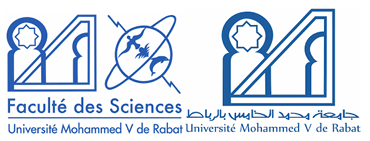

# TP 3 - Rétropropagation (Back-Propagation)
## ESSAMADI Oussama

---

## Étape 1 : Initialisation des Poids et des Biais 

**Théorie : Pourquoi est-ce important ?**

* _Problème d'initialisation aléatoire_ : Les mauvaises initialisations peuvent ralentir 
l'apprentissage ou empêcher la convergence
* _Méthode recommandée_ : Xavier

Pour chaque couche c , les poids 𝑊[𝑐] sont initialisés selon :

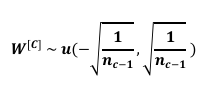

où `𝑛𝑐−1` est le nombre de neurones de la couche précédente.

Implémenter une fonction Python pour initialiser les paramètres pour un réseau de 
deux couche.

In [7]:
import numpy as np

def initialiser_parametres_xavier(n_x, n_h, n_y):
    """
    Initialise les paramètres (W et b) pour un réseau à deux couches
    en utilisant l'initialisation Xavier.
    
    Arguments:
    n_x -- taille de la couche d'entrée
    n_h -- taille de la couche cachée
    n_y -- taille de la couche de sortie
    
    Retourne:
    parameters -- dictionnaire contenant W1, b1, W2, b2
    """
    
    W1 = np.random.randn(n_h, n_x) * np.sqrt(1.0 / n_x)
    b1 = np.zeros((n_h, 1))
    
    W2 = np.random.randn(n_y, n_h) * np.sqrt(1.0 / n_h)
    b2 = np.zeros((n_y, 1))
    
    parameters = {
        "W1": W1,
        "b1": b1,
        "W2": W2,
        "b2": b2
    }
    
    return parameters

## Étape 2 : Propagation Avant (Forward-Propagation)

**Théorie : Calculs dans un réseau de deux couches**

1. Première couche :
    * Calcul de la somme pondérée : 

      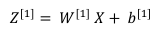
    * Fonction d’activation sigmoïde :

      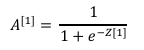

2. Deuxième couche :
    * Calcul de la somme pondérée : 

      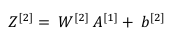
    * Fonction d’activation sigmoïde :

      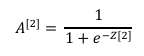


In [6]:
import numpy as np

def sigmoid(Z):
    return 1 / (1 + np.exp(-Z))

def forward_propagation(X, parameters):
    W1, b1, W2, b2 = parameters["W1"], parameters["b1"], parameters["W2"], parameters["b2"]
    
    Z1 = np.dot(W1, X) + b1
    A1 = sigmoid(Z1)
    
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    
    cache = {
        "Z1": Z1,
        "A1": A1,
        "Z2": Z2,
        "A2": A2
    }
    
    return A2, cache


## Étape 3 : Rétropropagation (Back-Propagation)

**Théorie : Calcul des gradients**

_Objectif : Mettre à jour les poids en minimisant la fonction de perte :_

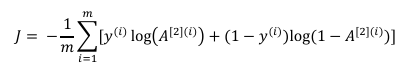

_Étapes de la rétropropagation :_

Pour un réseau de deux couches : 

1. Gradient de la couche de sortie :

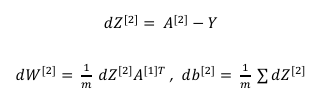

2. Propagation vers la première couche :

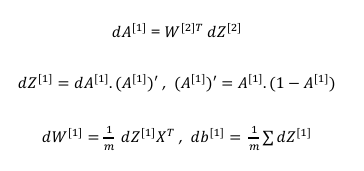

In [9]:
import numpy as np

def back_propagation(X, Y, cache, parameters):
    """
    Calcule les gradients de la rétropropagation pour un réseau à deux couches.
    
    Arguments:
    X -- données d'entrée de taille (n_x, m)
    Y -- labels de taille (1, m)
    cache -- dictionnaire contenant Z1, A1, Z2, A2
    parameters -- dictionnaire contenant W1, b1, W2, b2
    
    Retourne:
    grads -- dictionnaire contenant dW1, db1, dW2, db2
    """
    
    A1 = cache["A1"]
    A2 = cache["A2"]
    W2 = parameters["W2"]
    m = X.shape[1]
    
    # --- Gradients pour la couche de sortie ---
    dZ2 = A2 - Y  # dérivée de la fonction de coût par rapport à Z2
    dW2 = (1 / m) * np.dot(dZ2, A1.T)
    db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)
    
    # --- Propagation vers la couche cachée ---
    dA1 = np.dot(W2.T, dZ2)  # dérivée de la fonction de coût par rapport à A1
    dZ1 = dA1 * (A1 * (1 - A1))  # dérivée de la fonction sigmoïde
    dW1 = (1 / m) * np.dot(dZ1, X.T)
    db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)
    
    grads = {
        "dW1": dW1,
        "db1": db1,
        "dW2": dW2,
        "db2": db2
    }
    
    return grads


## Étape 4 : Problèmes des Gradients

**Théorie :**

* _Gradients évanescents_ : Lorsqu’on utilise la sigmoïde, les gradients se réduisent à des 
valeurs proches de zéro

* _Gradients explosifs :_  Amplification des gradients, entraînement instable.

**Solutions :**

1. Utiliser ReLU pour éviter l’atténuation des gradients. `ReLU(Z) = max(0, Z)`
2. Initialisation adaptée des poids (Xavier). 

In [11]:
import numpy as np

def relu(Z):
    return np.maximum(0, Z)

def relu_derivative(Z):
    return np.where(Z > 0, 1, 0)